In [156]:
xprm_list = ['xray/']
# xprm_list = ['xray', 'EM']
path = '/Users/tkimura/Desktop/RNP/check_contact/chain_summary/'
filename = 'chain_summary_calculated.csv'

import pandas as pd
from matplotlib import pyplot as plt
import cufflinks as cf

###################################################
# histogram
####################################################
def plot_hist(df,column, name):
    fig = plt.figure()
    df[column].plot.hist(bins=39, range=(1,100))
    plt.title(f'{name}')
    plt.show()
    fig.savefig(f'{path}{name}.png', dpi=1200)

In [157]:
for expr in xprm_list:
    file = path + expr + filename
    df = pd.read_csv(file)
    df_p = df.loc[df['type'] == 'p']
    df_r = df.loc[df['type'] == 'r']
    # print(df_p.columns)
    # plot_hist(df_p, 'r_chains', "R Chains in contact")

In [158]:
####################################################
# pie chart (maybe this is better)
####################################################
def plot_pie(df, column, title, name=""):
    # pie=cf.datagen.pie()
	# df = pd.read_csv(csvfile)
    fig = plt.figure()
    if 'model' in column:
        start = 0
    else:
        start = 1
    label_num = len(df[column].value_counts().sort_index()[start:])
    plt.title(f'{title}')
    labellist = []
    for i in range(0, label_num):
        if i <=3:
            labellist.append(df[column].value_counts().sort_index().index[i+start])
        else:
            labellist.append('')
    plt.pie(df[column].value_counts()[start:], labels=labellist)
    plt.legend(df[column].value_counts().sort_index()[start:].index,loc=5, ncol=2, bbox_to_anchor=(-0, 1))
    plt.show()
    fig.savefig(f'{path}{column}{name}.jpg', dpi=1200, bbox_inches="tight")

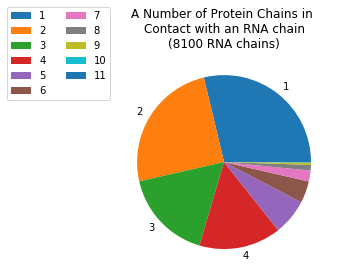

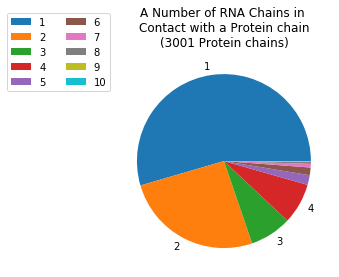

In [159]:
# -------------------------------
# chain counts
# -------------------------------
p_chain_counts = df_p['type'].count()
plot_pie(df_p, 'p_chains', f'A Number of Protein Chains in \nContact with an RNA chain\n({p_chain_counts} RNA chains)')

r_chain_counts = df_r['type'].count()
plot_pie(df_r, 'r_chains', f'A Number of RNA Chains in \nContact with a Protein chain\n({r_chain_counts} Protein chains)')

# 'pdbid', 'chain', 'type', 'r_chains', 'r_hbonds', 'avg_r_hbonds',
#        'p_chains', 'p_hbonds', 'avg_p_hbonds', 'models', 'models_hbonds'

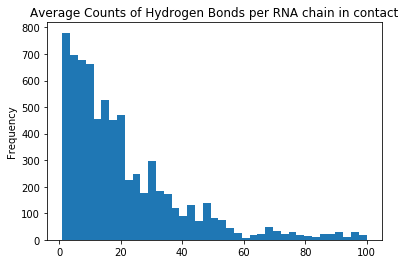

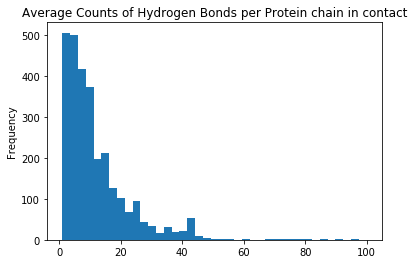

In [160]:
# -------------------------------
# avg. hbond counts per chain
# -------------------------------
plot_hist(df_p, 'avg_r_hbonds', 'Average Counts of Hydrogen Bonds per RNA chain in contact')
plot_hist(df_r, 'avg_p_hbonds', 'Average Counts of Hydrogen Bonds per Protein chain in contact')

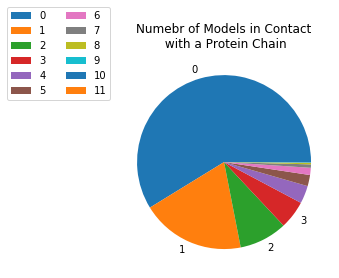

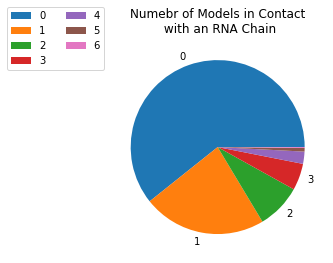

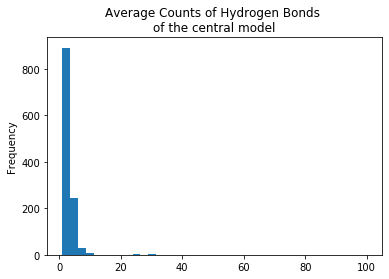

In [161]:
# -------------------------------
# models
# -------------------------------
plot_pie(df_p, 'models', 'Numebr of Models in Contact\n with a Protein Chain', 'protein')
plot_pie(df_r, 'models', 'Numebr of Models in Contact\n with an RNA Chain', 'RNA')
plot_hist(df_r, 'models_hbonds', 'Average Counts of Hydrogen Bonds \nof the central model')